# Capstone 1 Springboard
## Predictive Maintenance Utilizing CRISP-DM

![crisp-dm-phases](Data/tdsp-lifecycle2.png)

### Phase II. Data Understanding ###

**Set Objectives**

_Data collection_
> a.    Initial data collection report

_Data Description_
> a.    Data description report

_Data Quality_
> a.    Data quality analysis

_Review and approval point_

#### Data Collection ####

The organization, in this example, supplied a “Binary Large Object” (BLOB) of sensor data from one of its internal highly compartmentalized systems in a .csv file format. 

> **Sensor logs:** The raw access logs contain information on a select set of sensors which feedback signal data across the enterprise.

> **Data Source:** Sensor logs contain information on a select set of sensors which feedback signal data across the enterprise.

> **Location:** One undisclosed test site.

> **Method:** Due to the compartmentalized nature of the information utilized in the following overview, data was pulled, validated, cleared, and parsed to a .csv file for purposes of this project.

> **Obstacles:** None

At this moment, the organization has no plans to procure external databases or invest in dispatching teams to each site as its engineers, analysts, and managers are busy managing the data they currently have. At some point, however, they might want to consider an extended deployment of data mining results, in which case purchasing additional IT infrastructure to capture sensor data not centrally registered may be quite useful. It may also be helpful to have demographic information to see how the maintainers across regions vary in skill set and maintenance practices.

#### Data Description ####

This data description report will pronounce the data that has been acquired including:

> 1. Its format/type
> 2. Its shape
> 3. The fields/columns in each table. 

Additionally, this piece of the Data Understanding Phase will evaluate whether the data acquired satisfies the requirements listed in the Business Understanding Phase.

In [2]:
# Sets the backend of matplotlib to the 'inline'
%matplotlib inline

# Installing libraries for conducting data wrangling, exploration, and cleaning
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.core.display import HTML

pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Load Data File: CSV data as a string and convert to pandas DataFrame
df1_sensors = pd.read_csv('data/sensor.csv')

# Describe the data type
type(df1_sensors)

pandas.core.frame.DataFrame

In [3]:
# Describe data shape of the DataFrame used in this analysis
shape = {'sensors': df1_sensors.shape}
shape

{'sensors': (220320, 55)}

In [4]:
# Describe the fields/columns in each table
df1_sensors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
Unnamed: 0        220320 non-null int64
timestamp         220320 non-null object
sensor_00         210112 non-null float64
sensor_01         219951 non-null float64
sensor_02         220301 non-null float64
sensor_03         220301 non-null float64
sensor_04         220301 non-null float64
sensor_05         220301 non-null float64
sensor_06         215522 non-null float64
sensor_07         214869 non-null float64
sensor_08         215213 non-null float64
sensor_09         215725 non-null float64
sensor_10         220301 non-null float64
sensor_11         220301 non-null float64
sensor_12         220301 non-null float64
sensor_13         220301 non-null float64
sensor_14         220299 non-null float64
sensor_15         0 non-null float64
sensor_16         220289 non-null float64
sensor_17         220274 non-null float64
sensor_18         220274 non-null float64
sensor_19      

In [5]:
# Get a concise top level summary of the DataFrames used in this analysis
df1_sensors.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,NaN,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,NaN,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,37.86777,48.17723,32.08894,1.708474,420.8480,NaN,462.7798,459.6364,2.500062,666.2234,399.9418,880.4237,501.3617,982.7342,631.1326,740.8031,849.8997,454.2390,778.5734,715.6266,661.5740,721.8750,694.7721,441.2635,169.9820,343.1955,200.9694,93.90508,41.40625,31.25000,69.53125,30.46875,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,38.57977,48.65607,31.67221,1.579427,420.7494,NaN,462.8980,460.8858,2.509521,666.0114,399.1046,878.8917,499.0430,977.7520,625.4076,739.2722,847.7579,474.8731,779.5091,690.4011,686.1111,754.6875,683.3831,446.2493,166.4987,343.9586,193.1689,101.04060,41.92708,31.51042,72.13541,30.46875,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,39.48939,49.06298,31.95202,1.683831,419.8926,NaN,461.4906,468.2206,2.604785,663.2111,400.5426,882.5874,498.5383,979.5755,627.1830,737.6033,846.9182,408.8159,785.2307,704.6937,631.4814,766.1458,702.4431,433.9081,164.7498,339.9630,193.8770,101.70380,42.70833,31.51042,76.82291,30.98958,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


#### Data Quality ####

Below I will list the results of data quality issues. If quality problems are present, indicate possible solutions. Solutions to data quality problems typically depend on both data and business knowledge.
In this section, I will verify the data quality:

> 1. Is the data complete (will it answer the use-case provided in the Business Understanding Set Objectives)?
> 2. Is the data correct, and does it encompass errors? If so, where, how popular are they?
> 3. Are there any missing values in the data? If so, where, how popular are they?

Text(0.5, 1.05, 'Correlation Matrix')

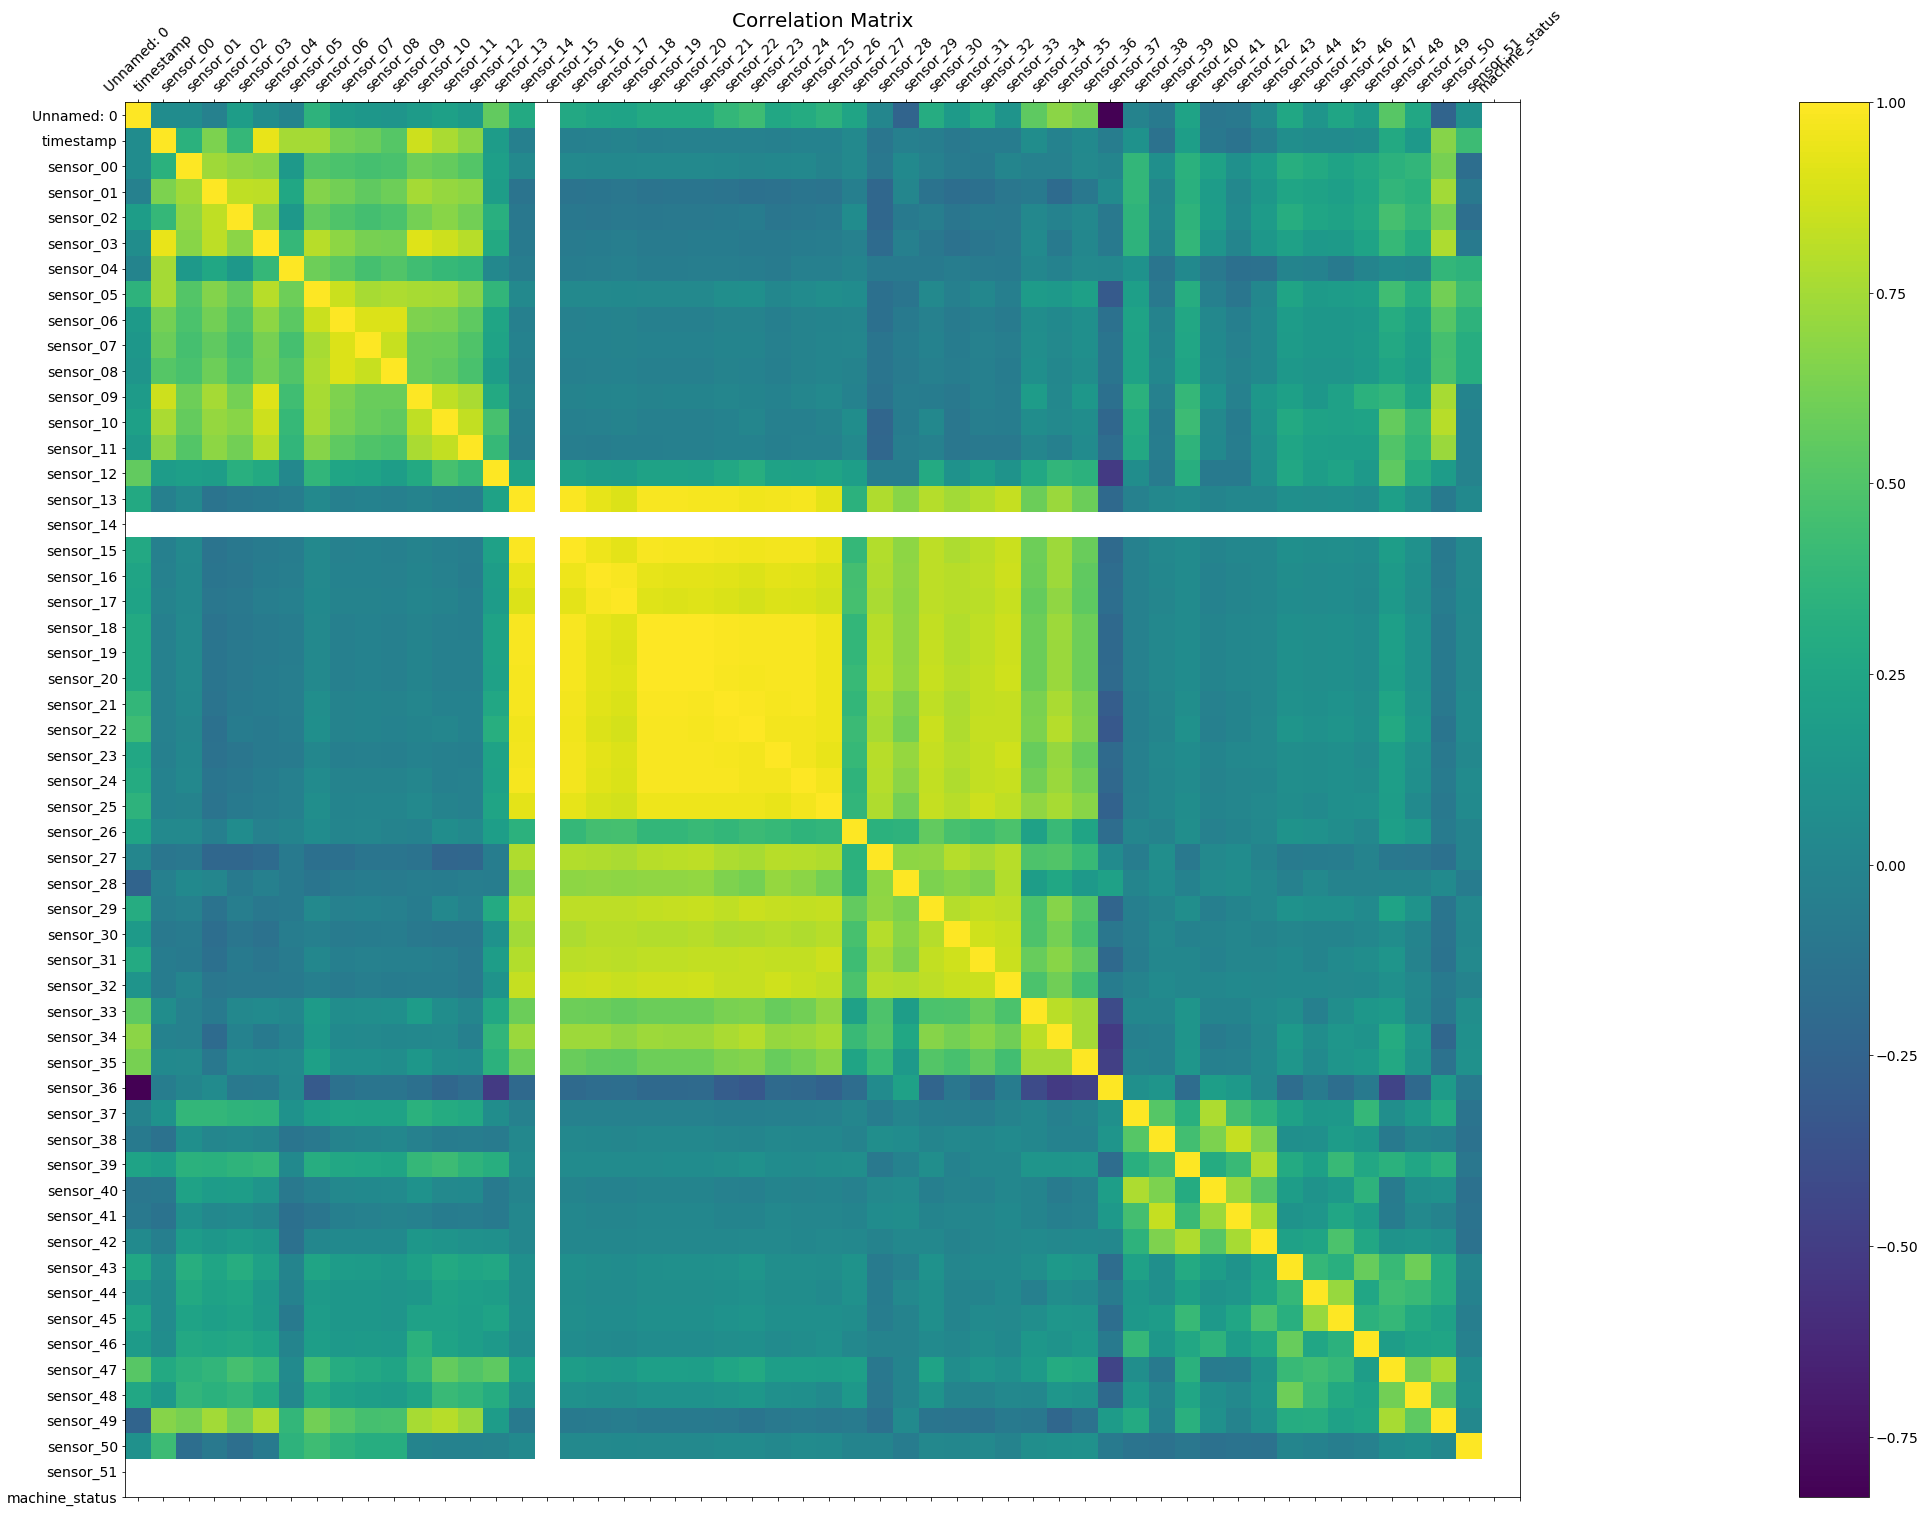

In [6]:
# Build a correllation matrix to prepare relationships for causation testing later.

f = plt.figure(figsize=(100, 25))
plt.matshow(df1_sensors.corr(), fignum=f.number)
plt.xticks(range(df1_sensors.shape[1]), df1_sensors.columns, fontsize=14, rotation=45)
plt.yticks(range(df1_sensors.shape[1]), df1_sensors.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=20)

In [7]:
# As shown above the data is not complete and is missing sensor 15 information this will prevent 

# Get count of nan values to see how this would impact any future analysis
dropped = df1_sensors.drop(df1_sensors.columns[-1],axis=1)
dropped. head(20)

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.21180,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,NaN,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.989580,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.21180,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,NaN,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.989580,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.21180,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,37.86777,48.17723,32.08894,1.708474,420.8480,NaN,462.7798,459.6364,2.500062,666.2234,399.9418,880.4237,501.3617,982.7342,631.1326,740.8031,849.8997,454.2390,778.5734,715.6266,661.5740,721.8750,694.7721,441.2635,169.9820,343.1955,200.9694,93.90508,41.40625,31.25000,69.53125,30.468750,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.16840,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,38.57977,48.65607,31.67221,1.579427,420.7494,NaN,462.8980,460.8858,2.509521,666.0114,399.1046,878.8917,499.0430,977.7520,625.4076,739.2722,847.7579,474.8731,779.5091,690.4011,686.1111,754.6875,683.3831,446.2493,166.4987,343.9586,193.1689,101.04060,41.92708,31.51042,72.13541,30.468750,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.21180,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,39.48939,49.06298,31.95202,1.683831,419.8926,NaN,461.4906,468.2206,2.604785,663.2111,400.5426,882.5874,498.5383,979.5755,627.1830,737.6033,846.9182,408.8159,785.2307,704.6937,631.4814,766.1458,702.4431,433.9081,164.7498,339.9630,193.8770,101.70380,42.70833,31.51042,76.82291,30.989580,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889
5,5,2018-04-01 00:05:00,2.453588,47.09201,53.16840,46.397568,637.6157,78.18568,13.41146,16.16753,15.89265,15.16204,39.29406,49.37051,32.23816,1.673484,418.9049,NaN,461.8948,461.9289,2.507935,663.4962,398.6428,872.4973,498.4064,974.6847,624.3462,739.2036,846.4617,429.6945,777.2820,700.7193,623.1481,734.3750,711.2128,438.6517,162.8758,333.7975,196.4579,90.84048,42.70833,31.77083,79.94791,30.989580,31.250000,42.70833,38.773150,63.65741,51.79398,38.773150,164.6412,66.55093,241.6088,201.6782
6,6,2018-04-01 00:06:00,2.455556,47.04861,53.16840,46.397568,633.3333,75.81614,13.43316,16.13136,15.65393,15.08247,38.29974,49.57146,32.00982,1.684984,420.3324,NaN,464.2402,467.5146,2.598702,667.4751,401.1847,882.7164,500.4944,981.2908,631.2756,740.9517,853.9647,458.3623,771.8188,722.5254,674.0740,707.8125,716.1951,433.5065,161.9678,330.3747,194.0652,89.23161,42.70833,32.29166,79.94791,31.250000,31.510420,43.22916,38.194440,61.92130,51.79398,39.062500,171.8750,67.70834,240.1620,200.2315
7,7,2018-04-